In [5]:
import matplotlib.pyplot as plt
import seaborn as sns  # Also make sure this is imported if using seaborn


In [2]:
import importlib
import segment as seg  # Assuming segment.py is in the same folder
importlib.reload(seg)  # Reload if you made recent edits

# Get df_original with Cluster_Label
segmented_df = seg.main()

# Preview
segmented_df.head()



[3 2 3 ... 3 3 3]


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,Cluster_Label
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,3
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,2
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,3
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,...,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1,4
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,...,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1,4


In [10]:
# 1.1 Check the Dataset Info
segmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Gender             8000 non-null   object 
 3   Income             8000 non-null   int64  
 4   CampaignChannel    8000 non-null   object 
 5   CampaignType       8000 non-null   object 
 6   AdSpend            8000 non-null   float64
 7   ClickThroughRate   8000 non-null   float64
 8   ConversionRate     8000 non-null   float64
 9   WebsiteVisits      8000 non-null   int64  
 10  PagesPerVisit      8000 non-null   float64
 11  TimeOnSite         8000 non-null   float64
 12  SocialShares       8000 non-null   int64  
 13  EmailOpens         8000 non-null   int64  
 14  EmailClicks        8000 non-null   int64  
 15  PreviousPurchases  8000 non-null   int64  
 16  LoyaltyPoints      8000 

In [13]:
segmented_df = segmented_df.drop(columns=['AdvertisingPlatform', 'AdvertisingTool'])


KeyError: "['AdvertisingPlatform', 'AdvertisingTool'] not found in axis"

In [12]:
# 1.5 Convert object columns to category
categorical_cols = ['Gender', 'CampaignChannel', 'CampaignType']
for col in categorical_cols:
    segmented_df[col] = segmented_df[col].astype('category')

segmented_df.head()


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Cluster_Label
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1,3
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1,2
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1,3
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1,4
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1,4


In [ ]:
# Email Click-Through Rate (CTR)
df['email_ctr'] = df.apply(
    lambda row: row['EmailClicks'] / row['EmailOpens'] if row['EmailOpens'] > 0 else 0, axis=1
)

# Website Engagement Depth
df['engagement_depth'] = df['PagesPerVisit'] * df['TimeOnSite']

# Social Sharing Propensity
df['social_propensity'] = df.apply(
    lambda row: row['SocialShares'] / row['WebsiteVisits'] if row['WebsiteVisits'] > 0 else 0, axis=1
)



In [ ]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Cluster_Label,email_ctr,engagement_depth,social_propensity
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,19,6,9,4,688,1,2,1.500000,17.745052,0.000000
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5,2,7,2,3459,1,3,3.500000,15.614122,0.119048
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,0,11,2,8,2337,1,2,0.181818,113.444015,0.000000
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,...,89,2,2,0,2463,1,4,1.000000,66.698958,1.893617
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,...,6,6,6,8,4345,1,4,1.000000,28.642290,0.000000


In [7]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [8]:
pip show numpy


Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [10]:
conda install python==3.11.5

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - python==3.11.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2025.03  | py311_openblas_0         100 KB
    aext-assistant-4.0.35      |py311hca03da5_jl4_0         2.6 MB
    aext-assistant-server-4.0.35|  py311hca03da5_0          23 KB
    aext-core-4.0.35           |py311hca03da5_jl4_0          56 KB
    aext-core-server-4.0.35    |  py311hca03da5_0          14 KB
    aext-panels-4.0.35         |  py311hca03da5_0         507 KB
    aext-panels-server-4.0.35  |  py311hca03da5_0         101 KB
    aext-share-notebook-4.0.35 |  py311hca03da5_0         456 KB
    aext-share-notebook-server-4.0.35|  py311hca03da5_0          10 KB
    aext-shared-4.0.35         |  py311hca03da5_0          41 KB
    aiobotocore-2.

In [16]:
pip show scipy

Name: scipy
Version: 1.13.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2024, SciPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions
 are met:

 1. Redistributions of source code must retain the above copyright
    notice, this list of conditions and the following disclaimer.

 2. Redistributions in binary form must reproduce the above
    copyright notice, this list of conditions and the following
    disclaimer in the documentation and/or other materials provided
    with the distribution.

 3. Neither the name of the copyright holder nor the names of its
    contributors may be used to endorse or promote products derived
    from this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLD

In [18]:
pip install scipy==1.9.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 5.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.0 requires scipy>=1.11.2, but you have scipy 1.9.3 which is incompatible.
imbalanced-learn 0.13.0 requires scipy<2,>=1.10.1, but you have scipy 1.9.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


Best number of PCA components: 2
Explained variance by 2 PCA components: [0.08034666 0.05788138]
Best k (clusters) for that PCA configuration: 6
Overall best silhouette score: 0.691710607159392
   Cluster        Age        Income      AdSpend  ClickThroughRate  \
0        0  44.104691  82281.068662  5610.291196          0.174275   
1        1  42.662701  85308.102737  4123.820591          0.127042   
2        2  43.141647  80725.349525  4917.227749          0.152472   
3        3  43.730842  86868.752123  4906.327417          0.151674   
4        4  44.695191  88427.352488  5600.264127          0.173504   
5        5  42.077092  79152.347963  4138.822707          0.127971   

   ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  \
0        0.115635      26.050078       5.994772    8.795728     48.453436   
1        0.088986      22.983962       4.922067    6.103220     51.929802   
2        0.104046      24.728475       5.509537    7.447555     50.278831   
3      

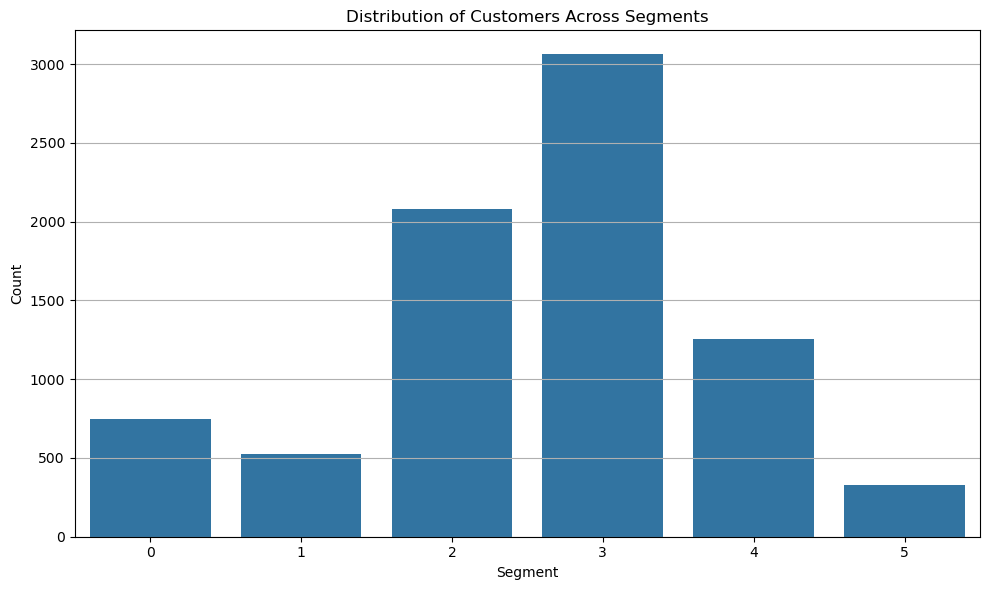

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion,Cluster_Label
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,...,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1,3
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,...,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1,2
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,...,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1,3
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,...,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1,4
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,...,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,...,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0,2
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,...,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0,1
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,...,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1,3
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,...,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1,3


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, boxcox, yeojohnson
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore 



def preprocess_data(df_original):
    """
    Preprocess the input DataFrame by:
    1. Dropping specified columns
    2. One-hot encoding categorical columns
    3. Scaling all features
    
    Parameters:
    df_original (pd.DataFrame): The original DataFrame to process
    
    Returns:
    pd.DataFrame: The preprocessed and scaled DataFrame
    """
    # Step 1: Drop specified columns
    df_drop = df_original.drop(columns=['AdvertisingPlatform', 'AdvertisingTool', 'CustomerID'])
    
    # Step 2: One-hot encode categorical columns
    columns_to_encode = ['Gender', 'CampaignChannel', 'CampaignType']
    df_encoded = pd.get_dummies(df_drop, columns=columns_to_encode, drop_first=False)
    
    # Step 3: Scale all features
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_encoded)
    
    # Convert back to DataFrame (since StandardScaler returns numpy array)
    df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
    
    return df_encoded, df_scaled, scaler




def optimize_clusters(df_scaled):
    """
    Find optimal PCA components and K-Means clusters by maximizing silhouette score.
    
    Parameters:
    df_scaled (pd.DataFrame): Preprocessed and scaled DataFrame
    
    Returns:
    tuple: (best_pca_n, best_k, best_silhouette, df_pca, labels, kmeans, pca_best)
        - best_pca_n: Optimal number of PCA components
        - best_k: Optimal number of clusters
        - best_silhouette: Best silhouette score achieved
        - df_pca: DataFrame after PCA transformation
        - labels: Cluster labels from best K-Means model
        - kmeans: Best K-Means model
        - pca_best: Best PCA model
    """
    # Set global random seed for reproducibility
    np.random.seed(42)
    
    # Define parameter ranges
    pca_range = range(2, min(df_scaled.shape[1], 10) + 1)  # From 2 to either 10 or number of features
    k_range = range(2, 15)  # Test cluster numbers from 2 to 14
    
    # Initialize variables to track best results
    overall_best_sil = -np.inf
    best_pca_n = None
    best_k = None
    best_scores = None
    best_pca = None
    
    # Loop over different numbers of PCA components
    for n_components in pca_range:
        try:
            # Apply PCA with n_components
            pca = PCA(n_components=n_components, random_state=42, svd_solver='full')
            X_pca_temp = pca.fit_transform(df_scaled)
            
            # Test K-Means for this PCA-transformed data
            scores_temp = []
            for k in k_range:
                try:
                    # Use the same algorithm as in the final model
                    kmeans_temp = KMeans(n_clusters=k, random_state=42, algorithm='lloyd')
                    # Use float64 for better precision consistency
                    labels_temp = kmeans_temp.fit_predict(X_pca_temp)
                    
                    # Ensure we have at least 2 clusters with data points
                    if len(np.unique(labels_temp)) < 2:
                        continue
                        
                    sil = silhouette_score(X_pca_temp, labels_temp)
                    scores_temp.append((k, sil))
                except Exception as e:
                    print(f"Error for k={k}: {e}")
                    continue
            
            # Skip if no valid scores for this PCA configuration
            if not scores_temp:
                continue
                
            # Find the best silhouette score for this number of PCA components
            best_for_this = max(scores_temp, key=lambda x: x[1])
            
            # Check if this configuration is better than the overall best
            if best_for_this[1] > overall_best_sil:
                overall_best_sil = best_for_this[1]
                best_pca_n = n_components
                best_k = best_for_this[0]
                best_scores = scores_temp
                best_pca = pca  # Store the best PCA model
        except Exception as e:
            print(f"Error for PCA n_components={n_components}: {e}")
            continue
 
    # Check if we found a valid solution
    if best_pca_n is None:
        raise ValueError("Could not find a valid clustering solution")
        
    print("Best number of PCA components:", best_pca_n)
    print(f"Explained variance by {best_pca_n} PCA components:", 
          best_pca.explained_variance_ratio_)
    print("Best k (clusters) for that PCA configuration:", best_k)
    print("Overall best silhouette score:", overall_best_sil)
    
    # Fit the best PCA and K-Means models
    pca_best = PCA(n_components=best_pca_n, random_state=42)
    df_pca = pca_best.fit_transform(df_scaled)
    kmeans = KMeans(n_clusters=best_k, random_state=42, algorithm='lloyd')
    # Use the original data type for consistency
    labels = kmeans.fit_predict(df_pca)
    
    return best_pca_n, best_k, overall_best_sil, df_pca, labels, kmeans, pca_best



def get_cluster_centroids(pca_best, kmeans, scaler, df_encoded, best_k):
    """
    Calculate and return cluster centroids in original feature space.
    
    Parameters:
    pca_best (PCA): Fitted PCA model with optimal components
    kmeans (KMeans): Fitted KMeans model with optimal clusters
    scaler (StandardScaler): Fitted scaler used for preprocessing
    df_encoded (pd.DataFrame): Encoded DataFrame (before scaling)
    best_k (int): Optimal number of clusters
    
    Returns:
    pd.DataFrame: DataFrame containing cluster centroids in original feature space
    """
    # 1. Get centroids in PCA-transformed space
    pca_centroids = kmeans.cluster_centers_
    
    # 2. Inverse transform using the correct PCA model
    centroids_standardized = pca_best.inverse_transform(pca_centroids)
    
    # 3. Reverse standardization to map back to original feature space
    centroids_original = centroids_standardized * scaler.scale_ + scaler.mean_
    
    # 4. Create DataFrame for better readability
    centroids_df = pd.DataFrame(centroids_original, columns=df_encoded.columns)
    
    # 5. Add cluster labels (0, 1, ..., k-1)
    centroids_df.insert(0, 'Cluster', range(best_k))
    print(centroids_df)
    
    return centroids_df


def main():
    # 1. Load data
    df_original = pd.read_csv('/Users/cindy/Desktop/DSA3101-Project-3/Data/digital_marketing_campaign_dataset.csv')

    # 2. Preprocess data (need to modify preprocess_data to return 3 objects)
    df_encoded, df_scaled, scaler = preprocess_data(df_original)
    
    # 3. Optimize clusters (need to modify optimize_clusters to return 7 objects)
    best_pca_n, best_k, overall_best_sil, df_pca, labels,kmeans, pca_best = optimize_clusters(df_scaled)
    
    # 4. Get centroids
    centroids_df = get_cluster_centroids(pca_best, kmeans, scaler, df_encoded, best_k)
    
    df_original['Cluster_Label'] = labels

    # Basic segment profile
    segment_sizes = df_original['Cluster_Label'].value_counts().sort_index()
    print("\nSegment sizes:")
    print(segment_sizes)

    # Visualize segment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster_Label', data=df_original)
    plt.title('Distribution of Customers Across Segments')
    plt.xlabel('Segment')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    return df_original

main()




In [ ]:
# 1. Load data
df_original = pd.read_csv('/Users/cindy/Desktop/DSA3101-Project-3/Data/digital_marketing_campaign_dataset.csv')

# 2. Preprocess data (need to modify preprocess_data to return 3 objects)
df_encoded, df_scaled, scaler = preprocess_data(df_original)

# 3. Optimize clusters (need to modify optimize_clusters to return 7 objects)
best_pca_n, best_k, overall_best_sil, df_pca, labels,kmeans, pca_best = optimize_clusters(df_scaled)

# 4. Get centroids
centroids_df = get_cluster_centroids(pca_best, kmeans, scaler, df_encoded, best_k)

df_original['Cluster_Label'] = labels

KeyboardInterrupt: 

In [3]:
# Basic segment profile
segment_sizes = df_original['Cluster_Label'].value_counts().sort_index()
print("\nSegment sizes:")
print(segment_sizes)

# Visualize segment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster_Label', data=df_labeled)
plt.title('Distribution of Customers Across Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

NameError: name 'df_original' is not defined